# SLC FINAL EXAM

### DATASET: 

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable is RainTomorrow. This means: Did it rain the next day? Yes or No.

### ATTRIBUTE INFORMATION:  

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


1. 'Date'= The date of observation

2. 'Location'=The common name of the location of the weather station

3. 'MinTemp'= The minimum temperature in degrees celsius

4. 'MaxTemp'= The maximum temperature in degrees celsius

5. 'Rainfall' = The amount of rainfall recorded for the day in mm

6. 'Evaporation'= The so-called Class A pan evaporation (mm) in the 24 hours to 9am
       
7. 'Sunshine'= The number of hours of bright sunshine in the day.

8. 'WindGustDir'= The direction of the strongest wind gust in the 24 hours to midnight

9. 'WindGustSpeed'= The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. 'WindDir9am'= Direction of the wind at 9am

11. 'WindDir3pm' = Direction of the wind at 3pm

12. 'WindSpeed9am'= Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. 'WindSpeed3pm'=  Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. 'Humidity9am'= Humidity (percent) at 9am

15. 'Humidity3pm'= Humidity (percent) at 3pm

16. 'Pressure9am'= Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. 'Pressure3pm'= Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18. 'Cloud9am'= Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are

19. 'Cloud3pm'= Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. 'Temp9am'= Temperature (degrees C) at 9am
       
21. 'Temp3pm'=  Temperature (degrees C) at 3pm

22. 'RainToday'=  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

23. 'RISK_MM'= The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

24. 'RainTomorrow'= The target variable. Did it rain tomorrow?

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [19]:
# Kindly change the below cells from markdown to code and execute it 

In [20]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
pd.options.display.float_format = '{:.6f}'.format

import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier

from sklearn. naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,ConfusionMatrixDisplay,precision_score, recall_score, f1_score,classification_report, roc_curve, auc, precision_recall_curve, average_precision_score


In [21]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,07-03-2012,Wollongong,16.000000,20.400000,8.200000,NaN,NaN,S,63.000000,SSW,SW,39.000000,20.000000,69.000000,92.000000,1018.500000,1017.600000,1.000000,8.000000,17.400000,15.600000,Yes,78.600000,Yes
1,06-01-2011,PerthAirport,18.500000,25.900000,16.000000,5.400000,11.800000,WSW,39.000000,SSW,WSW,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,7.000000,1.000000,22.200000,25.100000,Yes,0.000000,No
2,29-06-2014,Penrith,8.700000,16.500000,0.000000,NaN,NaN,WNW,56.000000,WNW,WNW,19.000000,22.000000,41.000000,41.000000,NaN,NaN,NaN,NaN,13.100000,15.100000,No,0.000000,No
3,16-12-2008,Cairns,25.500000,33.900000,0.200000,5.000000,7.000000,SSE,41.000000,SSE,SE,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,6.000000,5.000000,30.800000,31.500000,No,0.000000,No
4,21-04-2015,SalmonGums,3.800000,23.000000,0.000000,NaN,NaN,N,28.000000,NE,W,13.000000,7.000000,56.000000,29.000000,NaN,NaN,NaN,NaN,14.000000,21.100000,No,0.000000,No


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1040 non-null   object 
 1   Location       1040 non-null   object 
 2   MinTemp        1035 non-null   float64
 3   MaxTemp        1035 non-null   float64
 4   Rainfall       1029 non-null   float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       533 non-null    float64
 7   WindGustDir    969 non-null    object 
 8   WindGustSpeed  969 non-null    float64
 9   WindDir9am     981 non-null    object 
 10  WindDir3pm     1014 non-null   object 
 11  WindSpeed9am   1032 non-null   float64
 12  WindSpeed3pm   1023 non-null   float64
 13  Humidity9am    1031 non-null   float64
 14  Humidity3pm    1016 non-null   float64
 15  Pressure9am    929 non-null    float64
 16  Pressure3pm    932 non-null    float64
 17  Cloud9am       613 non-null    float64
 18  Cloud3pm

In [23]:
df.shape

(1040, 24)

In [24]:
num_rows = len(df)
print('Number of rows:', num_rows)

var_types = df.dtypes.value_counts()
print('Number and type of varibales:', var_types)

Number of rows: 1040
Number and type of varibales: float64    17
object      7
dtype: int64


In [25]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,1035.000000,1035.000000,1029.000000,582.000000,533.000000,969.000000,1032.000000,1023.000000,1031.000000,1016.000000,929.000000,932.000000,613.000000,597.000000,1034.000000,1022.000000,1040.000000
mean,12.008019,23.055942,2.185520,5.183505,7.606379,40.026832,13.768411,18.414467,69.535403,51.698819,1017.277718,1014.931438,4.592170,4.447236,16.794584,21.477495,2.158365
std,6.176816,6.809834,7.502780,3.426213,3.756107,13.703520,8.350102,8.446346,18.204141,20.227374,7.353785,7.243600,2.897498,2.745218,6.101344,6.665932,7.634139
min,-4.100000,-0.800000,0.000000,0.400000,0.000000,9.000000,0.000000,0.000000,6.000000,3.000000,986.300000,989.300000,0.000000,0.000000,-2.800000,-2.900000,0.000000
25%,7.500000,17.900000,0.000000,2.650000,5.000000,31.000000,7.000000,13.000000,58.000000,37.000000,1012.700000,1010.000000,1.000000,2.000000,12.300000,16.400000,0.000000
50%,11.800000,22.500000,0.000000,4.400000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,6.000000,5.000000,16.600000,21.050000,0.000000
75%,16.350000,27.700000,0.800000,7.000000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,20.900000,25.900000,0.600000
max,28.600000,43.900000,121.400000,25.600000,13.800000,113.000000,52.000000,54.000000,100.000000,100.000000,1040.200000,1035.700000,8.000000,8.000000,39.100000,42.400000,88.600000


In [26]:
df.describe(include = 'object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,1040,1040,969,981,1014,1029,1040
unique,890,49,16,16,16,2,2
top,23-07-2016,SalmonGums,W,N,SE,No,No
freq,4,33,80,85,84,788,829


In [27]:
cat_clm = df.select_dtypes(include=['object']).columns

summary =[]

for column in cat_clm:
    cat = df[column].value_counts()
    cat_per = df[column].value_counts(normalize=True) *100
    summary.append((column, len(cat),cat_per))
    
print('categorical variable summary:')
for column, num_cat, cat_per in summary:
    print(f"\n{column}:")
    print(f"Number of categoties: {num_cat}")
    print("Percentage of observation in each category:")
    print(cat_per)

categorical variable summary:

Date:
Number of categoties: 890
Percentage of observation in each category:
23-07-2016   0.384615
31-08-2010   0.288462
16-12-2009   0.288462
22-03-2012   0.288462
14-10-2013   0.288462
07-04-2015   0.288462
02-10-2013   0.288462
21-04-2017   0.288462
16-06-2017   0.288462
03-05-2014   0.288462
04-08-2009   0.288462
14-09-2011   0.192308
28-05-2009   0.192308
21-03-2011   0.192308
19-12-2015   0.192308
31-10-2009   0.192308
10-02-2012   0.192308
21-01-2012   0.192308
22-07-2016   0.192308
17-12-2008   0.192308
07-03-2012   0.192308
22-03-2017   0.192308
23-11-2016   0.192308
27-02-2011   0.192308
18-03-2015   0.192308
20-07-2012   0.192308
02-03-2016   0.192308
14-06-2016   0.192308
21-03-2009   0.192308
12-08-2014   0.192308
10-08-2016   0.192308
14-03-2015   0.192308
09-10-2013   0.192308
06-10-2013   0.192308
01-03-2016   0.192308
11-10-2014   0.192308
27-01-2012   0.192308
14-05-2011   0.192308
12-03-2017   0.192308
11-07-2014   0.192308
24-10-2009   

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [30]:
df = df.drop(["Evaporation",'Sunshine','Cloud9am','Location','Date'],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,16.000000,20.400000,8.200000,S,63.000000,SSW,SW,39.000000,20.000000,69.000000,92.000000,1018.500000,1017.600000,8.000000,17.400000,15.600000,Yes,78.600000,Yes
1,18.500000,25.900000,16.000000,WSW,39.000000,SSW,WSW,20.000000,22.000000,60.000000,36.000000,1004.600000,1003.600000,1.000000,22.200000,25.100000,Yes,0.000000,No
2,8.700000,16.500000,0.000000,WNW,56.000000,WNW,WNW,19.000000,22.000000,41.000000,41.000000,NaN,NaN,NaN,13.100000,15.100000,No,0.000000,No
3,25.500000,33.900000,0.200000,SSE,41.000000,SSE,SE,11.000000,19.000000,64.000000,59.000000,1009.800000,1007.400000,5.000000,30.800000,31.500000,No,0.000000,No
4,3.800000,23.000000,0.000000,N,28.000000,NE,W,13.000000,7.000000,56.000000,29.000000,NaN,NaN,NaN,14.000000,21.100000,No,0.000000,No


In [52]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [33]:
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

In [34]:
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)

In [36]:
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)

In [37]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)

In [38]:
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)

In [39]:
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)

In [40]:
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)

In [41]:
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)

In [42]:
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)

In [43]:
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)

In [45]:
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

In [48]:
df = df.drop(['Cloud3pm'],axis=1)

In [51]:
df = df.dropna(axis =0)
df.shape

(912, 18)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        912 non-null    float64
 1   MaxTemp        912 non-null    float64
 2   Rainfall       912 non-null    float64
 3   WindGustDir    912 non-null    object 
 4   WindGustSpeed  912 non-null    float64
 5   WindDir9am     912 non-null    object 
 6   WindDir3pm     912 non-null    object 
 7   WindSpeed9am   912 non-null    float64
 8   WindSpeed3pm   912 non-null    float64
 9   Humidity9am    912 non-null    float64
 10  Humidity3pm    912 non-null    float64
 11  Pressure9am    912 non-null    float64
 12  Pressure3pm    912 non-null    float64
 13  Temp9am        912 non-null    float64
 14  Temp3pm        912 non-null    float64
 15  RainToday      912 non-null    object 
 16  RISK_MM        912 non-null    float64
 17  RainTomorrow   912 non-null    object 
dtypes: float6

In [55]:
df_clm = df.columns
df_clm

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [63]:
df_clm = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm','RISK_MM']

In [56]:
labeler = LabelEncoder()

In [57]:
df['RainToday'] = labeler.fit_transform(df['RainToday'])
df['RainTomorrow'] = labeler.fit_transform(df['RainTomorrow'])
df['WindDir9am'] = labeler.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labeler.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = labeler.fit_transform(df['WindGustDir'])

In [60]:
df.shape

(912, 18)

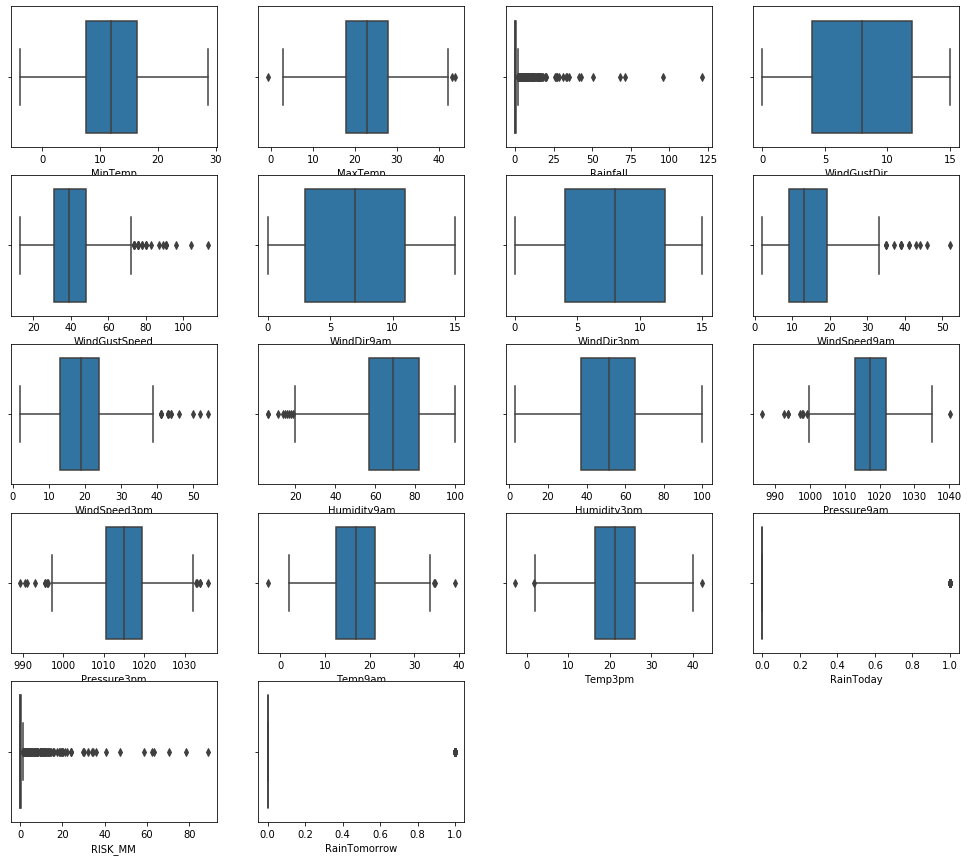

In [62]:
t =1
plt.figure(figsize=(17,15))
for i in df_clm:
    plt.subplot(5,4,t)
    sns.boxplot(df[i])
    t+=1
plt.show()

In [64]:
for i in df_clm:
    q1,q3 = np.quantile(df[i],[0.25,0.75])
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    df[i] = np.where(df[i] > ub, ub, df[i])
    df[i] = np.where(df[i] < lb, lb, df[i])

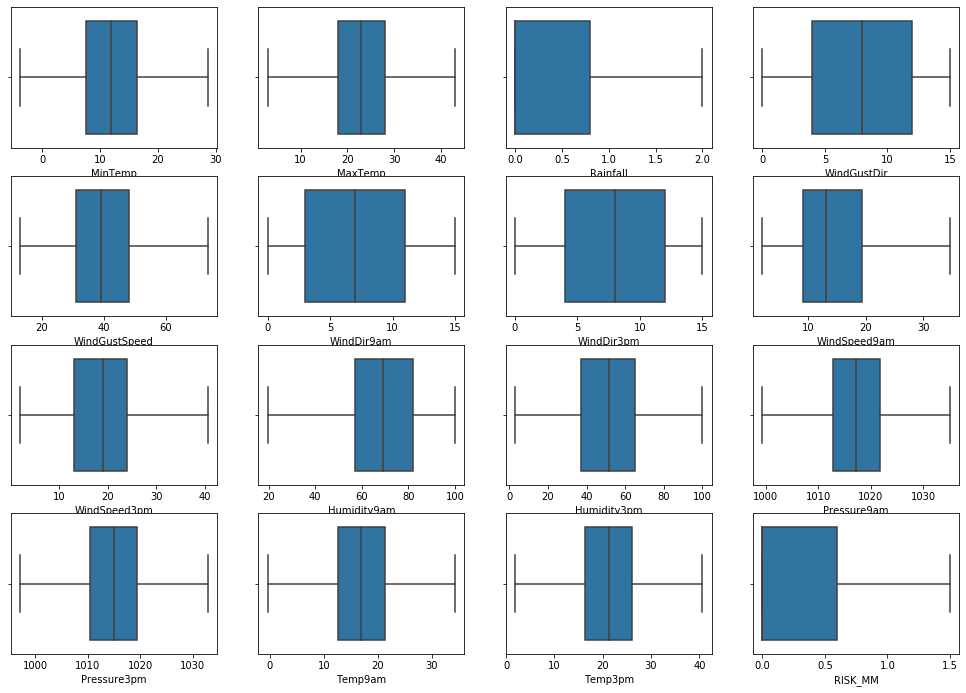

In [65]:
t =1
plt.figure(figsize=(17,15))
for i in df_clm:
    plt.subplot(5,4,t)
    sns.boxplot(df[i])
    t+=1
plt.show()

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


In [66]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.707543,0.077413,-0.144221,0.099760,-0.064805,-0.157242,0.119573,0.076216,-0.153712,0.048838,-0.368641,-0.383588,0.889676,0.674453,0.077942,0.040349,0.044828
MaxTemp,0.707543,1.000000,-0.260268,-0.214059,0.017523,-0.276295,-0.182556,-0.026751,-0.037171,-0.428417,-0.490827,-0.248988,-0.352811,0.875615,0.977587,-0.234887,-0.211495,-0.181801
Rainfall,0.077413,-0.260268,1.000000,0.138968,0.179794,0.148074,0.181896,0.114163,0.106318,0.416269,0.439997,-0.234661,-0.150128,-0.109343,-0.270432,0.966863,0.373710,0.318262
WindGustDir,-0.144221,-0.214059,0.138968,1.000000,0.207441,0.393857,0.611003,0.028824,0.133771,0.061894,0.008706,-0.200294,-0.112524,-0.193272,-0.221389,0.118738,0.059061,0.035903
WindGustSpeed,0.099760,0.017523,0.179794,0.207441,1.000000,-0.018497,0.181394,0.562608,0.643846,-0.162835,-0.037116,-0.410929,-0.384756,0.049786,-0.016833,0.171719,0.274455,0.241238
WindDir9am,-0.064805,-0.276295,0.148074,0.393857,-0.018497,1.000000,0.325520,-0.022392,0.056990,0.134421,0.202056,-0.029474,0.070719,-0.167935,-0.282287,0.139153,0.020508,0.014821
WindDir3pm,-0.157242,-0.182556,0.181896,0.611003,0.181394,0.325520,1.000000,0.034146,0.121170,0.016028,-0.029165,-0.175750,-0.078340,-0.193590,-0.192889,0.171332,0.018498,-0.006081
WindSpeed9am,0.119573,-0.026751,0.114163,0.028824,0.562608,-0.022392,0.034146,1.000000,0.494509,-0.251085,-0.032399,-0.208682,-0.177879,0.064586,-0.045751,0.112990,0.111444,0.084824
WindSpeed3pm,0.076216,-0.037171,0.106318,0.133771,0.643846,0.056990,0.121170,0.494509,1.000000,-0.063120,0.068162,-0.275282,-0.256146,0.049967,-0.066509,0.102734,0.157833,0.138374
Humidity9am,-0.153712,-0.428417,0.416269,0.061894,-0.162835,0.134421,0.016028,-0.251085,-0.063120,1.000000,0.643016,0.041561,0.089958,-0.395202,-0.423854,0.387094,0.323572,0.281699


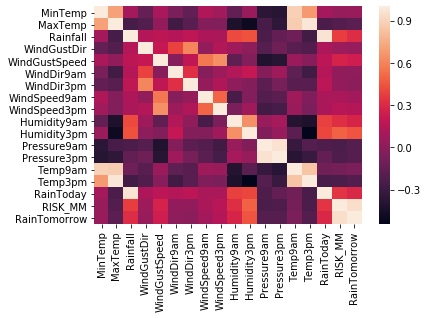

In [67]:
sns.heatmap(df.corr())

In [68]:
df.skew()

MinTemp          0.128314
MaxTemp          0.270419
Rainfall         1.170208
WindGustDir     -0.160264
WindGustSpeed    0.630171
WindDir9am       0.023787
WindDir3pm      -0.123327
WindSpeed9am     0.598958
WindSpeed3pm     0.395248
Humidity9am     -0.360040
Humidity3pm      0.047296
Pressure9am     -0.152621
Pressure3pm     -0.096743
Temp9am          0.159558
Temp3pm          0.263208
RainToday        1.254371
RISK_MM          1.229295
RainTomorrow     1.463550
dtype: float64

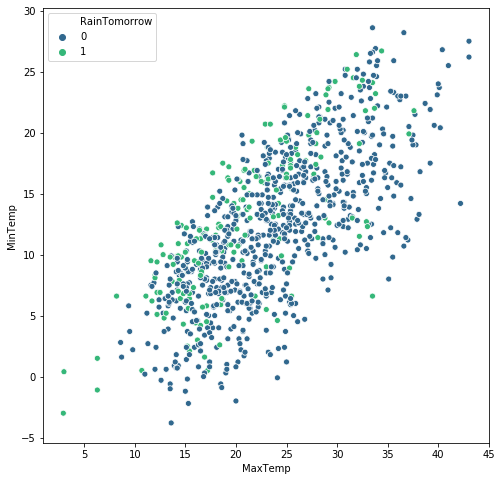

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'viridis', data =df)

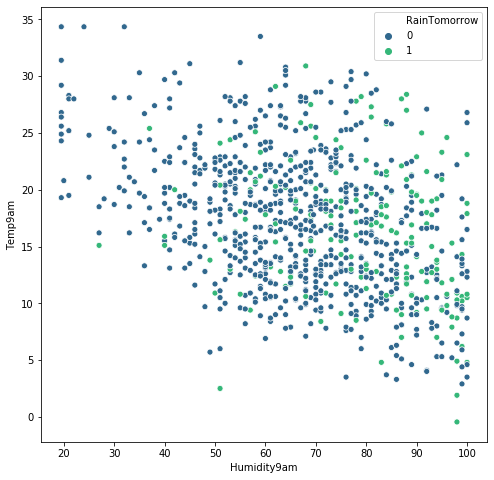

In [70]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'viridis', data =df)

In [ ]:
# the humidity is increasing the chnaces of rain are increasing

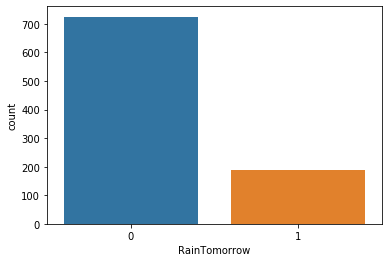

In [71]:
sns.countplot(df['RainTomorrow'])

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [72]:
X = df.drop(['RainTomorrow'], axis =1)
y = df['RainTomorrow']

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X ,y = smote.fit_resample(X,y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis =1)

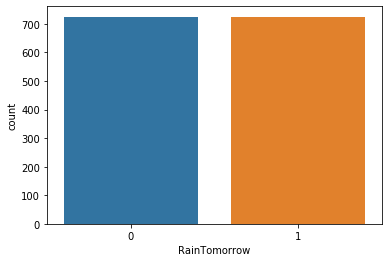

In [78]:
sns.countplot(df['RainTomorrow'])

In [79]:
X = df.drop(['RainTomorrow'], axis =1)
y = df['RainTomorrow'] 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=10)

In [93]:
X_train.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
dtype: object

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


In [81]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test,test_pred))

In [82]:
def get_train_report(model,train_data):
    train_pred = model.predict(train_data)
    return(classification_report(y_train,train_pred))

In [83]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data= cm, columns = ['Predicited:0','Predicited:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap= ListedColormap(['lightskyblue']), cbar = False,
                 linewidths= 0.1, annot_kws= {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [104]:
def plot_roc(model,test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('Flase Positive rate', fontsize =15)
    plt.ylabel('True Positive rate', fontsize = 15)
    plt.text(x =0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [109]:
from sklearn.linear_model import LogisticRegression

In [113]:
# lr = LogisticRegression()
# base_model = lr.fit(X_train, y_train)

In [ ]:
# plot_confusion_matrix(base_model,test_data = X_test)

In [ ]:
# plot_roc(base_model, test_data= X_test)

In [ ]:
# print(get_train_report(base_model,train_data = X_train))

In [ ]:
# print(get_test_report(base_model, test_data = X_test))

In [ ]:
# getting some unknown error everything is correct. and Bellow models are running fine. not sure about this. dont have any str vlaues in my X_train data. kindly have aa look and consider this 

In [158]:

# Precison, recall and F1 score are evaluation metrics commonly used in classification task to assess the performance of a model 
# Precison indicates thee models ability to minize flase positive 
#Recall indicated the models ability to capture all the postive instance 


In [ ]:
#Cohens Kappa value is a statistic that measure that agreement between two raters or evaluators who classify items into categories. it is commonly used to assess the reliability or agreement of machine learning model in classification tasks. 

### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [95]:
knn_classification = KNeighborsClassifier(n_neighbors =3)
knn_model = knn_classification.fit(X_train,y_train)

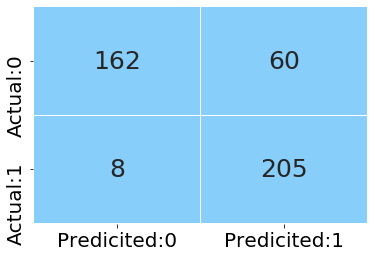

In [96]:
plot_confusion_matrix(knn_model,test_data = X_test)

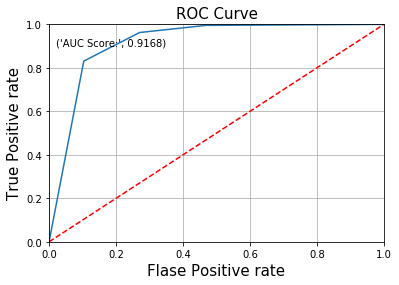

In [105]:
plot_roc(knn_model, test_data= X_test)

In [106]:
print(get_train_report(knn_model,train_data = X_train))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       503
           1       0.86      0.99      0.92       512

    accuracy                           0.92      1015
   macro avg       0.93      0.91      0.91      1015
weighted avg       0.92      0.92      0.91      1015



In [108]:
print(get_test_report(knn_model, test_data = X_test))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       222
           1       0.77      0.96      0.86       213

    accuracy                           0.84       435
   macro avg       0.86      0.85      0.84       435
weighted avg       0.87      0.84      0.84       435



In [128]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2,10),
                     'max_features' : ["sqrt","Log2"],
                     'min_samples_split':range(2,10),
                     'min_samples_leaf': range(1,10),
                      'max_leaf_nodes': range(1,10)}]

decisioin_tree_clas = DecisionTreeClassifier(random_state =10)
tree_grid = GridSearchCV(estimator = decisioin_tree_clas,
                         param_grid= tuned_paramaters,
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train,y_train)
print("Best Paramter:", tree_grid_model.best_params_,'\n')

Best Paramter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 7, 'min_samples_split': 2} 



In [131]:
dt_model = DecisionTreeClassifier(criterion=tree_grid_model.best_params_.get('criterion'),
                                max_depth= tree_grid_model.best_params_.get('max_depth'),
                                max_features= tree_grid_model.best_params_.get('max_features'),
                                max_leaf_nodes= tree_grid_model.best_params_.get('max_leaf_nodes'),
                                min_samples_leaf= tree_grid_model.best_params_.get('min_samples_leaf'),
                                min_samples_split= tree_grid_model.best_params_.get('min_samples_split'),
                                random_state= 10)
decision_tree = dt_model.fit(X_train, y_train)


In [132]:
train_report = get_train_report(decision_tree, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       503
           1       0.86      0.99      0.92       512

    accuracy                           0.91      1015
   macro avg       0.93      0.91      0.91      1015
weighted avg       0.92      0.91      0.91      1015



In [133]:
print(get_test_report(decision_tree, test_data = X_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       222
           1       0.86      0.99      0.92       213

    accuracy                           0.91       435
   macro avg       0.92      0.91      0.91       435
weighted avg       0.92      0.91      0.91       435



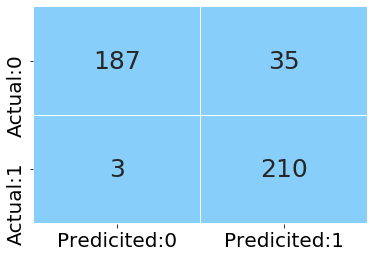

In [137]:
plot_confusion_matrix(decision_tree,test_data = X_test)

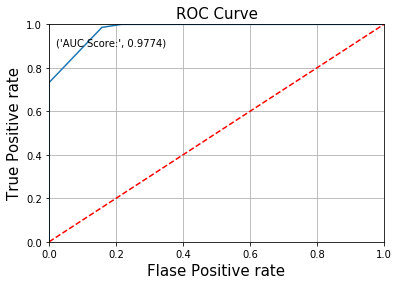

In [138]:
plot_roc(decision_tree, test_data= X_test)

In [140]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10,30,50,70,90],
                     'max_depth': [10,15,20],
                     'max_features' : ["sqrt","Log2"],
                     'min_samples_split':[2,5,8,11],
                     'min_samples_leaf': [1,5,9],
                      'max_leaf_nodes': [2,5,8,11]}]

random_forest_class = RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator = random_forest_class,
                         param_grid= tuned_paramaters,
                         cv = 5)
rf_grid_model = rf_grid.fit(X_train,y_train)
print("Best Paramter:", rf_grid_model.best_params_,'\n')

Best Paramter: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30} 



In [142]:
rf_model = RandomForestClassifier(criterion=rf_grid_model.best_params_.get('criterion'),
                                n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                max_depth= rf_grid_model.best_params_.get('max_depth'),
                                max_features= rf_grid_model.best_params_.get('max_features'),
                                max_leaf_nodes= rf_grid_model.best_params_.get('max_leaf_nodes'),
                                min_samples_leaf= rf_grid_model.best_params_.get('min_samples_leaf'),
                                min_samples_split= rf_grid_model.best_params_.get('min_samples_split'),
                                random_state= 10)
rf_model_c = rf_model.fit(X_train, y_train)

In [143]:
train_report = get_train_report(rf_model_c, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       512

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015



In [144]:
print(get_test_report(rf_model_c, test_data = X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       213

    accuracy                           1.00       435
   macro avg       1.00      1.00      1.00       435
weighted avg       1.00      1.00      1.00       435



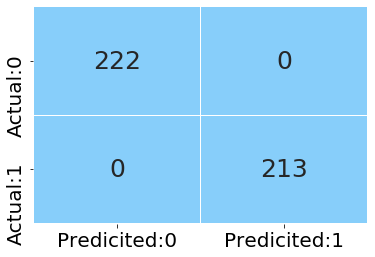

In [145]:
plot_confusion_matrix(rf_model_c,test_data = X_test)

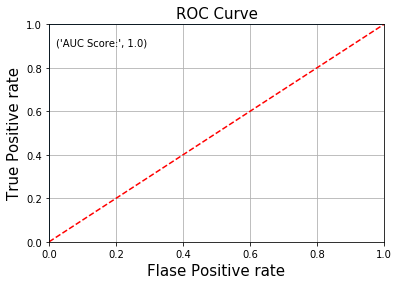

In [146]:
plot_roc(rf_model_c, test_data= X_test)

In [148]:
tuning_parameters = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6],
                     'max_depth': range(3,10),
                     'gamma': [0,1,2,3,4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv =3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)


AttributeError: 'GridSearchCV' object has no attribute 'best_parans_'

In [149]:
print('Best Paramters:',xgb_grid.best_params_, '\n')

Best Paramters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3} 



In [150]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                               gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train,y_train)

In [151]:
train_report = get_train_report(xgb_model, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       512

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015



In [152]:
print(get_test_report(xgb_model, test_data = X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       213

    accuracy                           1.00       435
   macro avg       1.00      1.00      1.00       435
weighted avg       1.00      1.00      1.00       435



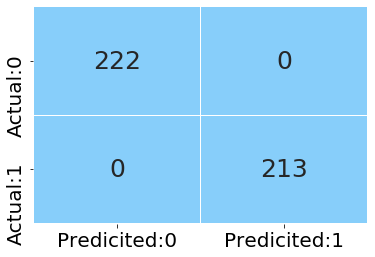

In [153]:
plot_confusion_matrix(xgb_model,test_data = X_test)

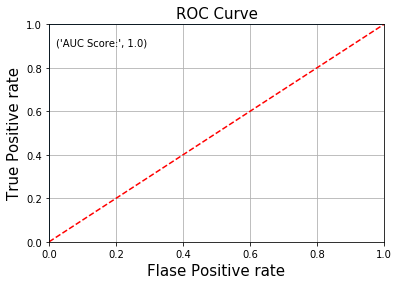

In [154]:
plot_roc(xgb_model, test_data= X_test)

In [159]:
gboost_model = GradientBoostingClassifier(n_estimators=150, max_depth=10, random_state=10)
gb_model = gboost_model.fit(X_train,y_train)

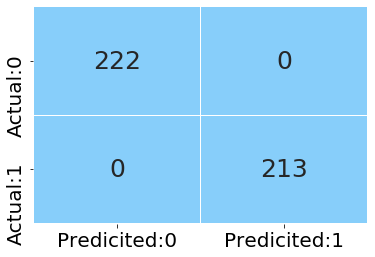

In [160]:
plot_confusion_matrix(gb_model,test_data = X_test)

In [161]:
print(get_test_report(gb_model, test_data = X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       213

    accuracy                           1.00       435
   macro avg       1.00      1.00      1.00       435
weighted avg       1.00      1.00      1.00       435



### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


### 1
The Decision tree model with hyperparamter tuning demonstrates a good overall fit based on the provided measure. the model achieves an
accuracy score of 0.91, indicating that it correctly predicts the traget varibale in 91% of cases. The recall score of 0.99 suggests that the 
model can effectively identifypositive instances, while the precison score of 0.86 indicates that it has a relatively low flase postive rate. 
Additionally the AUC value of 0.9774 suggests that the model has a high discriminatory power is distinguishing between postive and negative instances

### 2

In Tearms by of busniess interpretation, the decision tree model reveals tha variables that have the most sig impact on the target
varibales. By examining the structure of the decision tree, we can identify which variables are influential in determining the target outcome. 
Visual aids such as charts or graphs can futher illustrate this relationship. 

### 3

Among the changes made to the base model the most impactful on model performance cannot be determined without further information. 
the provided summary only includes the performance measure of the final model but does not specofy the modification made during hyperparametertunning 
or other enhancements. Without knowing the specific changes that were implementer, it is not possible to identify which modification effects on the models performance 

### 4

There are several key risk to consider regarding the results and interpretation of the model. First, Although the model achieves high accurance, recall, precision and AUC score on both the training and test sets, it is important to assess the g
generalizability of there results. the performance on the test set indicates how well the model can predict unseen data, but it is crucial to ensure that the 
test set is representative of real_world sceanrios .